In [1]:
import bg20
from bg20 import BristolGorilla2020

In [2]:
import pandas as pd

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch import optim

In [4]:
path = '../../BristolGorillas2020/images/train/'
data = '../data/bg2020_train.csv'

In [5]:
# Define relevant transformations inc. converting images to tensors
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((50,50))
                               ])

In [6]:
dataset = pd.read_csv(data)

In [7]:
dataset.head()

,Unnamed: 0,file_name,annotation_file,image_path,annotation_path,annotation
0,0,ayana-1-img-1.jpg,ayana-1-img-1.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.557292 0.212500 0.026042 0.036111
1,1,ayana-1-img-2.jpg,ayana-1-img-2.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.914844 0.618981 0.167187 0.308333
2,2,ayana-1-img-3.jpg,ayana-1-img-3.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.657031 0.431481 0.030729 0.079630
3,3,ayana-1-img-4.jpg,ayana-1-img-4.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.473438 0.503241 0.023958 0.058333
4,4,ayana-1-img-5.jpg,ayana-1-img-5.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.575521 0.295370 0.044792 0.083333


In [8]:
bristol_gorillas=BristolGorilla2020(path=path,dataset=dataset,transform=transform)

In [9]:
train_loader=DataLoader(dataset=bristol_gorillas,batch_size=10,shuffle=True)

In [10]:
img, label = next(iter(train_loader))

In [11]:
img.shape, label

(torch.Size([10, 3, 50, 50]), tensor([1, 3, 6, 0, 0, 0, 3, 0, 4, 5]))

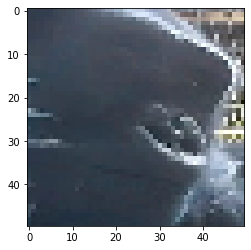

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img[1].permute(1, 2, 0));

**Learn2learn**

In [13]:
import learn2learn as l2l

In [14]:
dataset = dataset[:100]

In [15]:
dataset = l2l.data.MetaDataset(BristolGorilla2020(path=path,dataset=dataset,transform=transform))

In [16]:
transforms = [  # Easy to define your own transform
    l2l.data.transforms.NWays(dataset, n=1),
    l2l.data.transforms.KShots(dataset, k=1),
    l2l.data.transforms.LoadData(dataset),
]
taskset = l2l.data.TaskDataset(dataset, transforms, num_tasks=10)
for task in taskset:
    X, y = task

In [17]:
X, y

(tensor([[[[0.1086, 0.1096, 0.1081,  ..., 0.0623, 0.0672, 0.0825],
           [0.1158, 0.1169, 0.1119,  ..., 0.0591, 0.0655, 0.0733],
           [0.1103, 0.1131, 0.1020,  ..., 0.0522, 0.0525, 0.0594],
           ...,
           [0.0619, 0.0569, 0.0573,  ..., 0.0873, 0.0855, 0.0942],
           [0.0627, 0.0605, 0.0555,  ..., 0.0951, 0.0971, 0.0952],
           [0.0639, 0.0563, 0.0613,  ..., 0.1015, 0.1029, 0.1063]],
 
          [[0.0812, 0.0821, 0.0807,  ..., 0.0427, 0.0475, 0.0657],
           [0.0884, 0.0895, 0.0845,  ..., 0.0395, 0.0459, 0.0536],
           [0.0828, 0.0857, 0.0745,  ..., 0.0325, 0.0329, 0.0398],
           ...,
           [0.0383, 0.0373, 0.0376,  ..., 0.0638, 0.0659, 0.0746],
           [0.0431, 0.0409, 0.0359,  ..., 0.0715, 0.0729, 0.0717],
           [0.0443, 0.0367, 0.0417,  ..., 0.0780, 0.0794, 0.0827]],
 
          [[0.0930, 0.0939, 0.0924,  ..., 0.0466, 0.0515, 0.0641],
           [0.1002, 0.1055, 0.1005,  ..., 0.0435, 0.0498, 0.0576],
           [0.0946, 0.09